# Part 2 - EDA Overview of Extracted TMDB Data

> Quick EDA for checking overview of movie data extracted from TMDB api.


- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category

In [1]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('fivethirtyeight')
sns.set_context('talk')

pd.set_option('display.max_columns',100)

In [3]:
# plt.rcParams['figure.facecolor']

In [4]:
# FOLDER = "Data-Previous/tmdb/"
FOLDER = "Data/"
sorted(os.listdir(FOLDER))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

In [5]:
## Should show students glob
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz']

## Concatenating DataFrames

In [6]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,False,NaN,NaN,0,[],NaN,660095,tt9164964,en,Sikisma,A light and humorous exploration of one couple...,0.600,NaN,[],[],NaN,0,0.0,[],Released,NaN,Sikisma,False,0.0,0,NaN
4874,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,869161,tt9204890,en,Red Big Fire Truck,"Like the Academy Award nominated film BOYHOOD,...",0.600,/vlzClYjJrPuu8UbRS6D9YbX5eGc.jpg,"[{'id': 54632, 'logo_path': '/uX1xTRZz8aJbJiCL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-19,0,81.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Red Big Fire Truck,False,0.0,0,NaN
4875,False,NaN,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,474174,tt9440450,en,Out of Luck,A lottery operator tries to pay off a local ga...,0.600,/5v4RQif3y9B0BqHesc7hFYY2rPt.jpg,[],[],2015-12-04,0,106.0,[],Released,NaN,Out of Luck,False,2.0,2,NaN
4876,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,566002,tt9627600,es,A punto de despegar,Some arms do not stop tearing down walls and h...,0.600,/Aq2rRSMmHsnGwrL1TZuQ8UYCH8J.jpg,[],"[{'iso_3166_1': 'PE', 'name': 'Peru'}]",2015-10-06,0,85.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,A punto de despegar,False,5.0,3,NaN


In [7]:
## drop placeholder imdb ids of 0
df = df.loc[ df['imdb_id']!='0']
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,False,NaN,NaN,0,[],NaN,660095,tt9164964,en,Sikisma,A light and humorous exploration of one couple...,0.600,NaN,[],[],NaN,0,0.0,[],Released,NaN,Sikisma,False,0.0,0,NaN
4874,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,869161,tt9204890,en,Red Big Fire Truck,"Like the Academy Award nominated film BOYHOOD,...",0.600,/vlzClYjJrPuu8UbRS6D9YbX5eGc.jpg,"[{'id': 54632, 'logo_path': '/uX1xTRZz8aJbJiCL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-19,0,81.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Red Big Fire Truck,False,0.0,0,NaN
4875,False,NaN,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,474174,tt9440450,en,Out of Luck,A lottery operator tries to pay off a local ga...,0.600,/5v4RQif3y9B0BqHesc7hFYY2rPt.jpg,[],[],2015-12-04,0,106.0,[],Released,NaN,Out of Luck,False,2.0,2,NaN
4876,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,566002,tt9627600,es,A punto de despegar,Some arms do not stop tearing down walls and h...,0.600,/Aq2rRSMmHsnGwrL1TZuQ8UYCH8J.jpg,[],"[{'iso_3166_1': 'PE', 'name': 'Peru'}]",2015-10-06,0,85.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,A punto de despegar,False,5.0,3,NaN


### Adding Release Year

In [8]:
df['Release Year'] = df['release_date'].apply(lambda x: float(str(x).split('-')[0]))
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,False,NaN,NaN,0,[],NaN,660095,tt9164964,en,Sikisma,A light and humorous exploration of one couple...,0.600,NaN,[],[],NaN,0,0.0,[],Released,NaN,Sikisma,False,0.0,0,NaN,NaN
4874,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,869161,tt9204890,en,Red Big Fire Truck,"Like the Academy Award nominated film BOYHOOD,...",0.600,/vlzClYjJrPuu8UbRS6D9YbX5eGc.jpg,"[{'id': 54632, 'logo_path': '/uX1xTRZz8aJbJiCL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-19,0,81.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Red Big Fire Truck,False,0.0,0,NaN,2015.0
4875,False,NaN,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,474174,tt9440450,en,Out of Luck,A lottery operator tries to pay off a local ga...,0.600,/5v4RQif3y9B0BqHesc7hFYY2rPt.jpg,[],[],2015-12-04,0,106.0,[],Released,NaN,Out of Luck,False,2.0,2,NaN,2015.0
4876,False,NaN,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,566002,tt9627600,es,A punto de despegar,Some arms do not stop tearing down walls and h...,0.600,/Aq2rRSMmHsnGwrL1TZuQ8UYCH8J.jpg,[],"[{'iso_3166_1': 'PE', 'name': 'Peru'}]",2015-10-06,0,85.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,A punto de despegar,False,5.0,3,NaN,2015.0


In [9]:
## Saving combined data 
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname, lineterminator='\n')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45488 entries, 0 to 45487
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45488 non-null  bool   
 1   backdrop_path          21258 non-null  object 
 2   belongs_to_collection  2545 non-null   object 
 3   budget                 45488 non-null  int64  
 4   genres                 45488 non-null  object 
 5   homepage               11148 non-null  object 
 6   id                     45488 non-null  int64  
 7   imdb_id                45488 non-null  object 
 8   original_language      45488 non-null  object 
 9   original_title         45488 non-null  object 
 10  overview               44330 non-null  object 
 11  popularity             45488 non-null  float64
 12  poster_path            37124 non-null  object 
 13  production_companies   45488 non-null  object 
 14  production_countries   45488 non-null  object 
 15  re

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R,2000.0


# Q1: How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [10]:
## save separeate filters for movie with budget/revenue >0 
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


## print value counts of filters
print('- Movies with >0 for budget:')
display(filter_budget.value_counts())

print('- Movies with >0 for revenue:')
display(filter_revenue.value_counts())

- Movies with >0 for budget:


False    37230
True      8258
Name: budget, dtype: int64

- Movies with >0 for revenue:


False    39970
True      5518
Name: revenue, dtype: int64

In [11]:
## compare using and vs or for filtering financials 
filter_and = filter_budget & filter_revenue
print('- If use AND for final filter:')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If use OR for final filter:')
display(filter_or.value_counts())

- If use AND for final filter:


False    41561
True      3927
dtype: int64

- If use OR for final filter:


False    35639
True      9849
dtype: int64

In [12]:
## Using filter_or
filter_financial = filter_or
filter_financial.value_counts()

False    35639
True      9849
dtype: int64

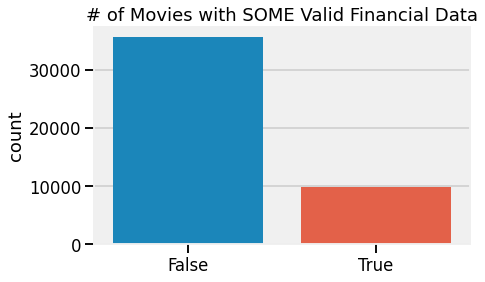

In [13]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

>- There are 13,404 movies with financial data (either >0 for revenue OR budget)

In [14]:
## Using only filtered financial movies for remaining EDA
plot_df = df[filter_financial].copy()
plot_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
5,False,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225,tt0119273,en,Heavy Metal 2000,Upon discovery of a shard of what could be the...,8.303,/mzOgKYOXiuwE5DIfagFs34bOb3J.jpg,"[{'id': 2216, 'logo_path': None, 'name': 'Helk...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2000-04-19,0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,False,6.1,151,R,2000.0
9,False,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070,tt0120263,sv,Sånger från andra våningen,A film poem inspired by the Peruvian poet Césa...,5.921,/heW06kNneH6nL59h4ZoaODYXFmY.jpg,"[{'id': 157, 'logo_path': None, 'name': 'SVT D...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2000-10-06,80334,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,False,7.2,205,NaN,2000.0
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.4,41,R,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45410,False,/rFzuLSbblWd72S7Zc4UWQOgBZB8.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,434049,tt6217766,fa,مرگ ماهی,An old woman's death brings her children toget...,0.600,/qucjfWF8NN1TUMhQNhUDewwglN2.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2016-04-09,144000,110.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,Death of the Fish,False,0.0,0,NaN,2016.0
45423,False,/yaZqYo7cQSkeVAID4hnIQAxIGbj.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",https://movie.douban.com/subject/25743807/,421834,tt6419698,zh,王牌,"In 1934, agents of the Kuomintang government r...",0.600,/41ehjayjVOXsiHNaMPPiS4FpjaS.jpg,[],[],2014-12-31,6,90.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,NaN,Who Is Undercover,False,8.0,1,NaN,2014.0
45448,False,NaN,NaN,20000,"[{'id': 35, 'name': 'Comedy'}]",https://standuprecords.com/collections/david-heti,634030,tt7165192,en,It Was OK: An Album of Comedy by David Heti,"The deeper the truths, the deeper the laughs: ...",0.600,/mLnBrBtrWIpk

# Q2: What Years are represented?

### Adding Release Year

In [15]:
years = plot_df['Release Year'].dropna().astype(int).unique()
years

array([2000, 2002, 2001, 1999, 1997, 2004, 2003, 1995, 2005, 2014, 2006,
       2017, 2007, 2009, 2008, 2012, 2010, 2011, 2015, 2013, 2021, 2022,
       2016, 2018, 2019, 2020])

- Figure saved as Images/EDA_year_counts.png


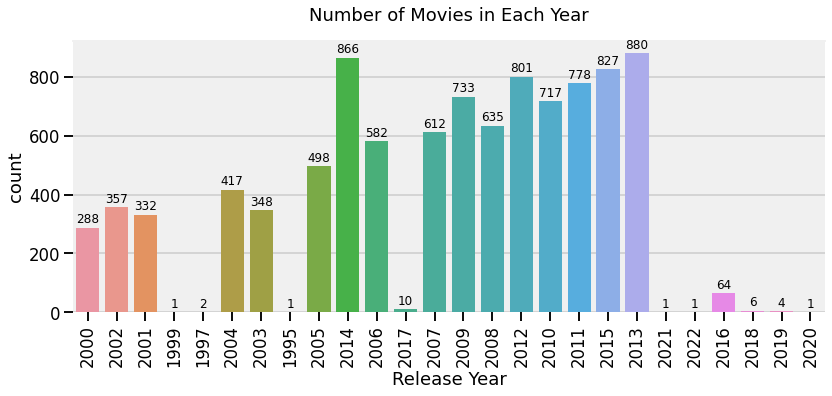

In [16]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=plot_df, x='Release Year', order =years );
ax.set_title('Number of Movies in Each Year',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax
pf.savefig('Images/EDA_year_counts.png',ax=ax, facecolor='white')

## Q3: How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [17]:
df['certification'].value_counts()

R                                  4606
NR                                 2576
PG-13                              2451
PG                                 1182
G                                   428
NC-17                               110
Unrated                               3
None                                  1
NRW                                   1
10                                    1
PG-13                                 1
R                                     1
Not Rated                             1
IMDB                                  1
ScreamFest Horror Film Festival       1
UR                                    1
-                                     1
TV-PG                                 1
Name: certification, dtype: int64

In [18]:
## fixing inconsitent certifications


# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      34122
R         4607
NR        2583
PG-13     2452
PG        1182
G          428
NC-17      110
IMDB         1
None         1
NRW          1
TV-PG        1
Name: certification, dtype: int64

In [19]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NC-17','NR']

- Figure saved as Images/EDA_certification_counts.png


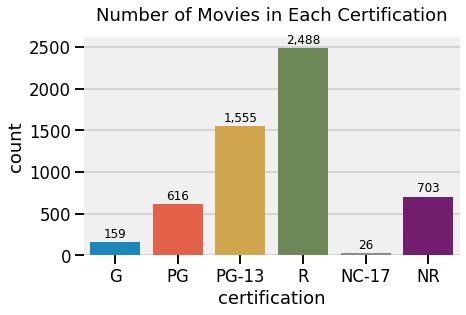

In [25]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in Each Certification',y=1.05)
pf.annotate_bars(ax,fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
# sns.despine(ax.get_figure(),left=True)
pf.savefig('Images/EDA_certification_counts.png',ax=ax,
           facecolor='white')

## Q4: What is the average revenue per certification category?

- Figure saved as Images/EDA_avg_revenue_certification.png


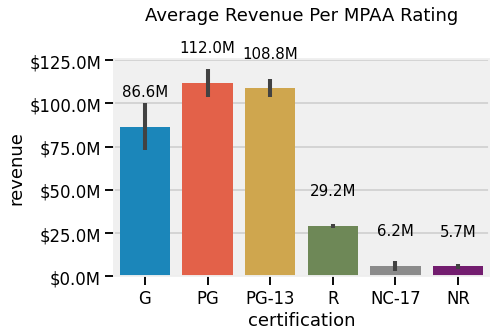

In [28]:
ax= sns.barplot(data=plot_df, x='certification',y='revenue', 
                order=cert_order,ci=68);
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',xytext=(0,35))
ax.set_title('Average Revenue Per MPAA Rating',y=1.15);
pf.savefig('Images/EDA_avg_revenue_certification.png',ax=ax, facecolor='white')

mil_fmt = pf.get_funcformatter(kind='m')
ax.yaxis.set_major_formatter(mil_fmt)

## Q5: What is the average budget per certification category?

- Figure saved as Images/EDA_avg_budget_certification.png


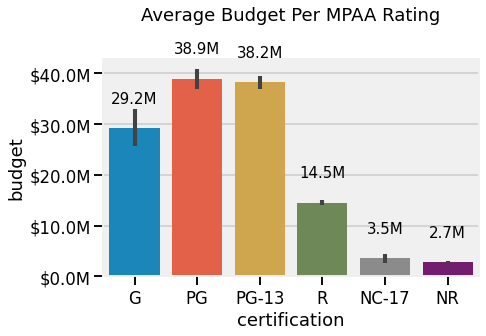

In [30]:
ax= sns.barplot(data=plot_df, x='certification',y='budget', 
                order=cert_order,ci=68);
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',xytext=(0,30))
ax.set_title('Average Budget Per MPAA Rating',y=1.15);
ax.yaxis.set_major_formatter(pf.get_funcformatter(kind='m'))
pf.savefig('Images/EDA_avg_budget_certification.png',ax=ax, facecolor='white')


## Q6: What is the average ROI (%) for Movies with All Financial Data?

In [31]:
## Save plot_df with movies that had buget AND revnue
plot_df = df[filter_and].copy()
## calculate ROI
plot_df['ROI (%)'] = (df['revenue']- df['budget'])/df['budget'] *100

plot_df.info()
plot_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 3 to 45461
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  3927 non-null   bool   
 1   backdrop_path          3744 non-null   object 
 2   belongs_to_collection  852 non-null    object 
 3   budget                 3927 non-null   int64  
 4   genres                 3927 non-null   object 
 5   homepage               1699 non-null   object 
 6   id                     3927 non-null   int64  
 7   imdb_id                3927 non-null   object 
 8   original_language      3927 non-null   object 
 9   original_title         3927 non-null   object 
 10  overview               3923 non-null   object 
 11  popularity             3927 non-null   float64
 12  poster_path            3894 non-null   object 
 13  production_companies   3927 non-null   object 
 14  production_countries   3927 non-null   object 
 15  rel

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year,ROI (%)
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0,8469.968667
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.4,41,R,2002.0,-87.580000
13,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.7,4009,G,2000.0,399.632364
16,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.9,247,R,2000.0,-98.675213
17,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.1,5297,PG-13,2000.0,337.110484


In [32]:
## remove NR from cert-order for ROI
cert_order_roi = cert_order[:-1]
cert_order_roi

['G', 'PG', 'PG-13', 'R', 'NC-17']

- Figure saved as Images/EDA_avg_roi_certification.png


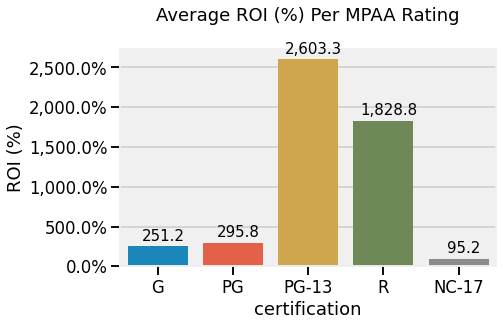

In [33]:
ax= sns.barplot(data=plot_df, x='certification',y='ROI (%)', 
                order=cert_order_roi,ci=None);
pf.annotate_bars(ax, convert_millions=False,ha='center',xytext=(5,10),fmt=',.1f')
ax.set_title('Average ROI (%) Per MPAA Rating',y=1.1);
ax.yaxis.set_major_formatter('{x:,}%')
pf.savefig('Images/EDA_avg_roi_certification.png',ax=ax, facecolor='white')

# Summary

- According to initial EDA, R movies are more common, but generate less revenue. However, in terms of ROI, they are almost as successful as PG-13 movies.